In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from scipy import stats
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor

rng = np.random.RandomState(42)

In [2]:
transactions = pd.read_csv('data/transactions_small_clean_1p.csv')

In [3]:
labels = transactions['Label']

In [4]:
del transactions['Label']

In [5]:
X_train = transactions.values

In [6]:
outliers_fraction = sum(labels/float(len(labels))) * 2
print(outliers_fraction)

0.000798873968121


# One-class SVM

In [ ]:
clf = svm.OneClassSVM(nu=0.95  + 0.05* outliers_fraction, kernel="rbf", gamma='auto', max_iter=10)

In [ ]:
clf.fit(X_train)

In [ ]:
pred = clf.predict(X_train)

In [ ]:
pred = (pred - 1)*(-0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels, pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Robust covariance

In [7]:
clf_rc = EllipticEnvelope(contamination=outliers_fraction)

In [8]:
clf_rc.fit(X_train)

/home/charlioxumykj/miniconda3/envs/aind/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-32.887603261368085 > -34.187984540652060)
  % (det, previous_det), RuntimeWarning)
/home/charlioxumykj/miniconda3/envs/aind/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-32.913700790452644 > -34.828797079578536)
  % (det, previous_det), RuntimeWarning)
/home/charlioxumykj/miniconda3/envs/aind/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-32.913700790452644 > -33.537349448224248)
  % (det, previous_det), RuntimeWarning)
/home/charlioxumykj/miniconda3/envs/aind/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-32.991436291873036 > -33.294780234217335)
  % (det, previous_det), RuntimeWarning)
/home/charlioxumykj/minicond

EllipticEnvelope(assume_centered=False, contamination=0.0007988739681211236,
         random_state=None, store_precision=True, support_fraction=None)

In [9]:
pred_rc = clf_rc.predict(X_train)

In [10]:
print(len(pred_rc))
pred_rc = (pred_rc-1)*(-1)/2
print(len(pred_rc[pred_rc==0]))
print(len(pred_rc[pred_rc==1]))

157722
157596
126


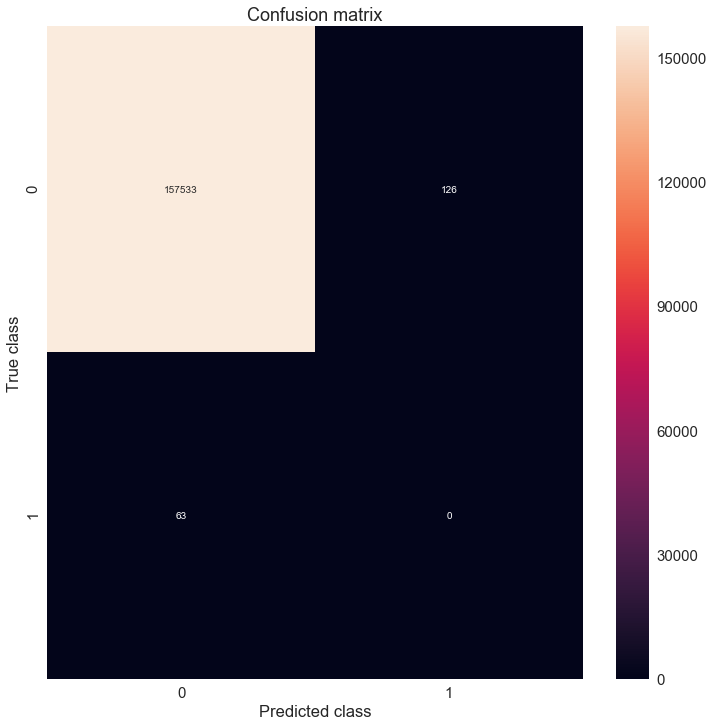

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels, pred_rc)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Isolation Forest

In [ ]:
clf_if = IsolationForest(max_samples=2000, contamination=outliers_fraction, random_state=rng)

In [ ]:
clf_if.fit(X_train)

In [ ]:
pred_if = clf_if.predict(X_train)

In [ ]:
print(len(pred_if))
pred_if = (pred_if-1)*(-1)/2
print(len(pred_if[pred_if==0]))
print(len(pred_if[pred_if==1]))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels, pred_if)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
clf_lof = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)

In [ ]:
pred_lof = clf_lof.fit_predict(X_train)

In [ ]:
print(len(pred_lof))
pred_lof = (pred_lof-1)*(-1)/2
print(len(pred_lof[pred_lof==0]))
print(len(pred_lof[pred_lof==1]))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels, pred_lof)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()